## TECHIN 513 HW1 – Modifying Signals

Author names go here 

(This should be a markup cell, which means that when you run it you just get formated text.)

In [132]:
# We'll refer to this as the "import cell." Every module you import should be imported here.    
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
import simpleaudio as sa
import decimal
import scipy.signal as sig
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

In this lab, you will work through a series of exercises to introduce you to working with audio signals and explore the impact of different amplitude and time operations on signals.  This is a two-week hw.  You should plan on completing the first 2 assignments in the first week.

## HW 1 turn in checklist

•	your Jupyter or Colab notbooks (uploaded as .pdf with your outputs).

Note: You can work together but you need to submit your own work. do not copy paste from each other


## Assignment 1 -- Working with sound files

A. Download the train.wav sound file provided. Using the scipy.io wavfile package (see 
Background document), read in the file using the saving the audio vector and sampling 
frequency in variables x1 and fs1, respectively. Print the sampling rate (which should be 
32kHz) and the shape of x1, which will tell you the length and number of channels. 

In [133]:
# Assignment 1 - Time Scaling Function

# Part A
fs1, x1 = wavfile.read('./sounds/train32.wav')
print(f'Sampling rate: {fs1} Hz')
print("Shape of audio data: ", x1.shape)
print(f'Number of samples : {len(x1)}')
print(f'Type : {x1.dtype}')
audio_length = len(x1)/fs1
print(f'Length of audio : {audio_length}s')

Sampling rate: 32000 Hz
Shape of audio data:  (50313,)
Number of samples : 50313
Type : int16
Length of audio : 1.57228125s


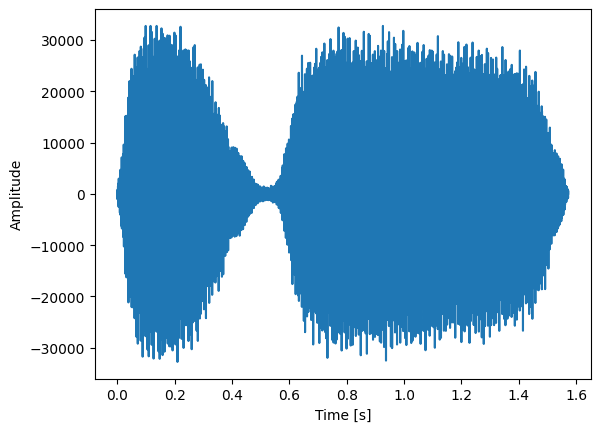

In [134]:
# Part A continued
time1 = np.linspace(0., audio_length, x1.shape[0])
plt.plot(time1, x1)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

B. Write out two new versions of the file in wav format using different sampling rates: 
fs2=fs1/2 (16 kHz) and fs3=1.5*fs1. Note that the wav.write function requires the 
sampling frequency to be an integer. Also, the simpleaudio package is limited in the 
sa.mpling frequencies that it will support, so you cannot use arbitrary frequencies.

In [135]:
# Part B

# write out 16 kHz version of the file convert to int before to avoid floating values
fs2 = int(fs1/2)
wavfile.write('train16kHz.wav', fs2, x1)

# write out 48 kHz version of the file
fs3 = int(1.5*fs1)
wavfile.write('train48kHz.wav', fs3, x1)

C. Using the simpleaudio package (see Background document), read in the three different 
versions of the train sound file and play each one.

In [149]:
# play original sound file
fs32audio = sa.WaveObject.from_wave_file("./sounds/train32.wav")
play32obj = fs32audio.play()
play32obj.wait_done()
print()

# play 16 kHz version of the file
fs16_audio = sa.WaveObject.from_wave_file("train16kHz.wav")
play16obj = fs16_audio.play()
play16obj.wait_done()

# play 48 kHz version of the file
fs48_audio = sa.WaveObject.from_wave_file("train48kHz.wav")
play48obj = fs48_audio.play()
play48obj.wait_done()

###  Discussion

Comment on how the audio changes when the incorrect sampling frequency is used.


### Comment 
When the sampling frequency is halved, the pitch of the audio changes and the audio sounds a little slower.
When the sampling frequency is changed to 1.5 times, the audio seems to higher in pitch and sounds a little faster

## Assignment 2 -- Amplitude Operations on Signals

A. Create a discrete time signal s1 that is the same length as x1 and has value 1 for 
t=[0,0.5] and value 0.2 for t>0.5.  You can use the command below where len1 is the 
length of x1 and n0 is the index corresponding to t=0.5 
s1 = np.concatenate((np.ones(n0),0.2*np.ones(len(x1)-n0)) 
Multiply x1 with s1 to create v1. Save this signal to a wav file.

In [137]:
# Assignment 2 - Amplitude Operations on Signals
# Part A

# Read in the train.wav file
fs1, x1 = wavfile.read('./sounds/train32.wav')

# Find the length of x1 and the index corresponding to t = 0.5
len1 = len(x1)
n0 = int(0.5 * fs1)

# Create the signal s1
s1 = np.concatenate((np.ones(n0),0.2*np.ones(len(x1)-n0)))

# Multiply x1 and s1 to create v1
v1 = x1 * s1

# Save the signal v1 to a wav file
wavfile.write('v1.wav', fs1, v1.astype('int16'))

B. Create a discrete-time decaying ramp signal r1, that is the same length as x1. The 
signal should have value 1 at time 0 and linearly decay to value 0.  (Hint: use 
numpy.arange.) Multiply x1 with r1 to create v2. Save this signal to a wav file. 

In [138]:
# Part B

# Create a signal with a length equal to x1
# r1 = np.arange(0, 1, 1/len(x1))
r1 = np.linspace(1, 0, len(x1))

# Multiply x1 with r1 to create v2
v2 = x1 * r1

# Save v2 to a wav file
wavfile.write("v2.wav", fs1, v2.astype('int16'))

C. Read in v1 and v2 using simpleaudio and play the two different modifications 
together with the original, to verify that the volume of the second whistle is reduced.

In [139]:
# Part C

# play v1
v1_audio = sa.WaveObject.from_wave_file("v1.wav")
v1_play_obj = v1_audio.play()
v1_play_obj.wait_done()

# play v2
v2_audio = sa.WaveObject.from_wave_file("v2.wav")
v2_play_obj = v2_audio.play()
v2_play_obj.wait_done()

###  Discussion

Discuss the differences that the two modifications have on the signal. What would happen if you defined s1 to take value 2 for the [0,0.5] range? If you wanted a smooth but faster decay in amplitude, what signal might you use?  

### Comment
If s1 were defined to take value 2 for the [0,0.5] range, the amplitude of the signal would be twice as large in that time range. This would result in a louder sound for that portion of the signal.

If you wanted a smooth but faster decay in amplitude, you might use an exponential decay function as the signal.

## Assignment 3 -- Time Scaling Audio Signals 

In [140]:
# Assignment 3 -- Title of assignment 3

# Part A
def timescale(x, fs, a):
    n, d = decimal.Decimal(a).as_integer_ratio()
    # [n, d] = (np.double(a)).as_integer_ratio()
    y = sig.resample_poly(x,d,n)
    t = np.arange(0,len(y),1) * (1.0 / fs)
    return y,t


In [141]:
# Part B

# Read in the train.wav file
fs1, x1 = wavfile.read('./sounds/train32.wav')

# create time vector for x1
t_x1 = np.arange(0,len(x1),1)*(1/fs1)

# use timescale function to get w(t)
w, t_w = timescale(x1.astype('float16'), fs1, 2)

# use timescale function to get v(t)
v, t_v = timescale(x1.astype('float16'), fs1, 0.5)

# create time-reversed version of x1
# z = np.ascontiguousarray(x1[::-1])
z = np.flip(x1)
t_z = t_x1

# save resulting signals to wav files
wavfile.write('w.wav', fs1, w.astype(np.int16))
wavfile.write('v.wav', fs1, v.astype(np.int16))
wavfile.write('z.wav', fs1, z.astype('int16'))

C. Load a figure and plot the four signals (x1, w, v, and z) using a 4x1 subplot. Adjust the x 
and y axis limits to have the same ranges in both plots. Be sure to title the plots and HWel 
axes appropriately. For the time axis, you should plot time in msec, for which you will 
need to multiple the time array by 1000 as in the example in the Background document. 
Do not use grids on the subplots. Adjust the spacing to avoid overlap. If you have 
implemented the code correctly, the figure should look something like this. 

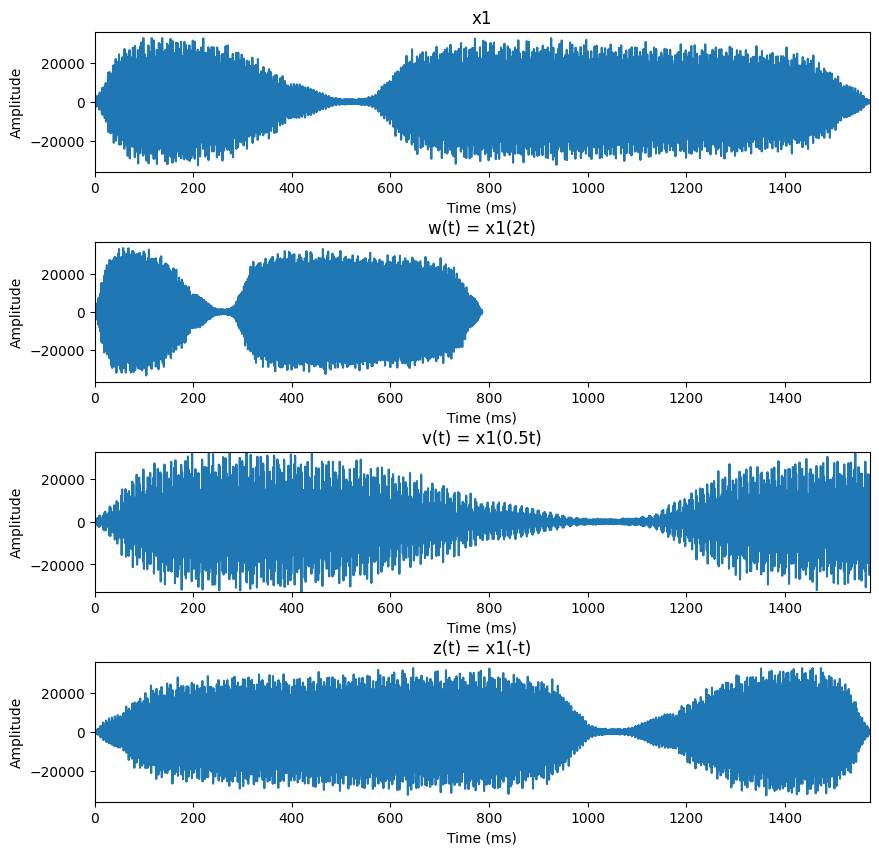

In [142]:
# Part C

# Convert time array to milliseconds
t_x1 = t_x1 * 1000
t_w = t_w * 1000
t_v = t_v * 1000
t_z = t_z * 1000

# Create a 4x1 subplot
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Plot x1
axs[0].plot(t_x1, x1)
axs[0].set_title('x1')
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim([0, max(t_x1)])

# Plot w
axs[1].plot(t_w, w)
axs[1].set_title('w(t) = x1(2t)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim([0, max(t_x1)])

# Plot v
axs[2].plot(t_v, v)
axs[2].set_title('v(t) = x1(0.5t)')
axs[2].set_xlabel('Time (ms)')
axs[2].set_ylabel('Amplitude')
axs[2].set_xlim([0, max(t_x1)])
axs[2].set_ylim([min(x1), max(x1)])

# Plot z
axs[3].plot(t_z, z)
axs[3].set_title('z(t) = x1(-t)')
axs[3].set_xlabel('Time (ms)')
axs[3].set_ylabel('Amplitude')
axs[3].set_xlim([0, max(t_x1)])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
plt.show()

D. Read in the signals you created using simpleaudio and play them to verify that they sound 
different based on what you would expect from these transformations. 

In [143]:
# Part D

# play v
v_audio = sa.WaveObject.from_wave_file("v.wav")
v_audio_obj = v_audio.play()
v_audio_obj.wait_done()

# play w
w_audio = sa.WaveObject.from_wave_file("w.wav")
w_audio_obj = w_audio.play()
w_audio_obj.wait_done()

# play z
z_audio = sa.WaveObject.from_wave_file("z.wav")
z_audio_obj = z_audio.play()
z_audio_obj.wait_done()

###  Discussion

Suppose a student runs the figure command before every call to subplot. When you run your script, what changes do you expect to see? How will the plots change?

### Comment
The plots will appear in separate figure windows, each with their own title and axis labels, rather than being arranged in a single figure with multiple subplots and a shared title and axis labels.

## Assignment 4 -- Time Shift Operations

A. Write a function called timeshift that takes as input: a signal x, the sampling frequency fs 
(in Hz), and a time shift t0 (in seconds). The function should implement y(t) = x(t+t0) 
and produce as output the portion of the shifted signal starting at time 0. Assume that the 
original signal has value zero outside the time window. Your function should: 
1. Find the integer shift n0 given t0 and fs.
2. Use conditional control that tests whether the time shift is positive or negative 
   1. For a time delay, create y by concatenating a zero vector with the original 
        signal. (The output should be longer than the original signal.) 
   2. For a time advance, create y by copying the portion of the starting from n0 
        and then appending n0 zeroes at the end of the signal. (The output should be 
        the same length as the original signal.) 
3. Based on the length of the final signal and the sampling frequency, create a time 
vector that corresponds to the output signal length, starting at 0. 
4. Return the new signal and the time vector. 

In [144]:
# Part A

def timeshift(x, fs, t0):
    n0 = int(t0*fs)
    if n0 > 0:
        y = x[n0:]
        y = np.concatenate((y, np.zeros(n0)))
    elif n0 < 0:
        y = np.concatenate((np.zeros(-n0), x))
    else:
        y = x
    t = np.arange(0, len(y))/fs
    return y, t

B. Use the function to create x1(t+0.5) and x1(t-2). Plot the shifted signals with the 
original in a 3x1 plot: x1(t), x1(t+0.5), and x1(t-2). The x-axis should be between 0 
and 4 for all three plots. HWel axes and title the plot.

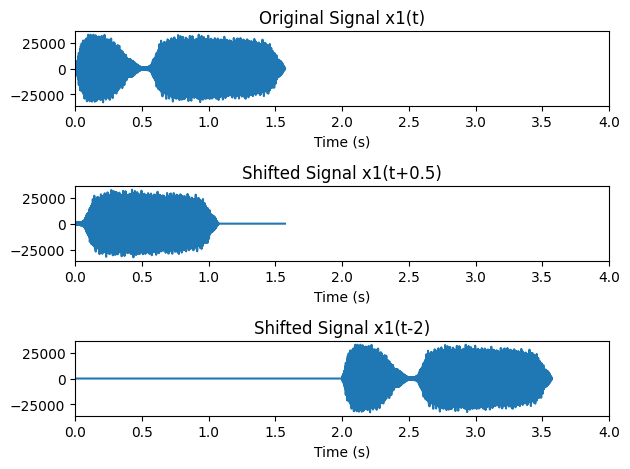

In [145]:
# Part B

t_x1 = np.arange(0,len(x1),1)*(1/fs1)
x1_shift_p, t_p = timeshift(x1, fs1, 0.5)
x1_shift_n, t_n = timeshift(x1, fs1, -2)

plt.figure()
plt.subplot(3,1,1)
plt.plot(t_x1, x1)
plt.xlim(0,4)
plt.title("Original Signal x1(t)")
plt.xlabel("Time (s)")
plt.subplot(3,1,2)
plt.plot(t_p, x1_shift_p)
plt.xlim(0,4)
plt.title("Shifted Signal x1(t+0.5)")
plt.xlabel("Time (s)")
plt.subplot(3,1,3)
plt.plot(t_n, x1_shift_n)
plt.xlim(0,4)
plt.title("Shifted Signal x1(t-2)")
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()

C. Play all three signals. For the signal that has been advanced, you should be able to 
hear that part of the sound is missing, since we have not preserved those samples. 

In [146]:
# Part C

wavfile.write("x1_p.wav", fs1, x1_shift_p.astype('int16'))
# play x1_shift_p
x1_shift_p_audio = sa.WaveObject.from_wave_file("x1_p.wav")
x1_shift_p_play_obj = x1_shift_p_audio.play()
x1_shift_p_play_obj.wait_done()

wavfile.write("x1_n.wav", fs1, x1_shift_n.astype('int16'))
# play x1_shift_n
x1_shift_n_audio = sa.WaveObject.from_wave_file("x1_n.wav")
x1_shift_n_play_obj = x1_shift_n_audio.play()
x1_shift_n_play_obj.wait_done()

### Discussion

There is a trivial case that you should ideally test for. If the shift is zero, then the output is the original signal. If the shift is an advance bigger than the original signal, then the output will be zero. Comment on whether your current implementation correctly handles these cases and whether there is a better implementation.


### Comments
If the shift is zero, the output should be the original signal. In my implementation I have multiplied the shift with the sampling rate. If the resultant sampling rate n0 is 0 it will trigger the `else` condition keeping the signal the same `y=x` . 

## Bonus

Using the code developed in the exercises above, create a new signal that makes use of your 
sounds and four signal modifications: addition, multiplication, time scaling and time shifting.  
You can also concatenate sounds, and if you want to insert a brief silence between sounds then 
just use a vector of zeroes. Remember that when you add or multiply two signals, they must be 
the same length. Also, be careful not to increase the amplitude too much, since it can result in 
clipping. For example, if you add two signals, you may want to scale the result by 0.5.

In [147]:
fsb, xb = wavfile.read('./sounds/violin11.wav')
print(f'Sampling rate: {fsb} Hz')
print("Shape of audio data: ", xb.shape)
print(f'Number of samples : {len(xb)}')
print(f'Type : {xb.dtype}')
audio_length = len(xb)/fsb
print(f'Length of audio : {audio_length}s')

Sampling rate: 11025 Hz
Shape of audio data:  (219908, 2)
Number of samples : 219908
Type : int16
Length of audio : 19.946303854875282s


In [148]:
# Read in the train.wav and bird.wav files
fs1, x1 = wavfile.read('./sounds/violin11.wav')
fs2, x2 = wavfile.read('./sounds/flute11.wav')

# create time vector for x1 and x2
t_x1 = np.arange(0,len(x1),1)*(1/fs1)
t_x2 = np.arange(0,len(x2),1)*(1/fs2)

# use timescale function to get w(t)
w, t_w = timescale(x1, fs1, 2)

# # use timescale function to get v(t)
# v, t_v = timescale(x2, fs2, 0.5)

# create time-shifted version of x2
# x2_shift = timeshift(x2,fs2,2)

#create a silence vector with zeroes
silence = np.zeros(int(fs1*1))

#concatenate train.wav, silence, bird.wav, v(t) and w(t)
new_signal = np.concatenate((x1, w))

#scale the new signal by 0.5
new_signal *= 0.5

# save resulting signal to wav file
wavfile.write('new_signal.wav', fs1, new_signal.astype('int16'))